## Replicating of "It's alright, John" by Smith and Dorling (1996) in the BMJ

#### Date: May, 2024

#### Notebook by: [crahal](https://www.github.com\crahal)

This is some initial work to quickly replicate '“I'm all right, John": voting patterns and mortality in England and Wales, 1981–92' by George Davey Smith and Daniel Dorling in the BMJ in 1996 (in advance of the 1997 election of Tony Blair). The primary motivation -- as per [Philip Clarke's](https://www.ndph.ox.ac.uk/team/philip-clarke) idea -- is to see if anything substantially changed in terms of patterns between voteshare and health outcomes. A link to that original paper can be found [here](https://www.bmj.com/content/313/7072/1573), and with a couple of other useful contextual things in the BMJ [here](https://www.bmj.com/content/340/bmj.c3294) and [here](https://www.bmj.com/content/384/bmj.q538).

First, lets load a few custom helper functions which we need throughout this exercise:

In [1]:
from helpers import make_merged, make_df_gpd,\
                    make_sii, make_hid,\
                    plot_scatters, plot_bivariate_choropleth_map, plot_over_time,\
                    make_temporal_printouts,\
                    make_summary_tables

Next, want to download our 2019 General Election voting data from [here](https://researchbriefings.files.parliament.uk/documents/CBP-8749/HoC-GE2019-results-by-constituency.xlsx) and put it somewhere like `./data/raw/voting/`. We next want to download our deprivation data from [here](https://commonslibrary.parliament.uk/constituency-data-indices-of-deprivation/), and put that somewhere like `./data/raw/deprivation/`. Next, download the mortality data from [here](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/adhocs/1961numbersandagestandardisedmortalityratesforprematuredeathsbyparliamentaryconstituencyandsexin2021), and put that somewhere like `./data/raw/mortality/`. A few notes about the data:

* We only examine constituencies in England (because a lot of the data comes from NHS England, or the cross-tabbed data is only available for England). 
* There were, accordingly, 533 constituencies in the 2019 General Election. Note, However, that one constituency returned the Speaker of the House of Commons (Lindsay Hoyle, Chorley).
* We primarily use two indicies of deprivation: Health deprivation and disability, and the Index of Multiple Deprivation. There is a House of Commons Library briefing paper on this [here](https://commonslibrary.parliament.uk/research-briefings/cbp-7327/).
* The mortality data is at the level of rates per 100,000 population, standardised to the 2013 European Standard Population (this allows comparison between populations which may contain different proportions of people of different ages).
* For correlations using deprivation data, we use [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) for consistency because the indices of deprivation come in the form of ordinal 'deprivation ranks' (which only show how deprived an area is relative to other areas in England).
* Our shapefile for the choropleth map comes from the [Westminster Parliamentary Constituencies (December 2019)](https://www.data.gov.uk/dataset/53f92606-da07-4432-bc20-98518c079f6f/westminster-parliamentary-constituencies-december-2019-boundaries-uk-bgc) boundaries file provided by the Office for National Statistics.

Next, lets merge all these datasets together on the individual constituencies with left merges onto the voting data as an index.

In [2]:
df_m = make_merged()

Lets make our first visualisation and print out some accompanying summary statistics for each of the four rank correlations calculated:

Labour vote share vs ASMR (F) pearsons r: 0.6505, p-value 1.9892309691476485e-65
Labour vote share vs ASMR (M) pearsons r: 0.707, p-value 6.947740245646491e-82


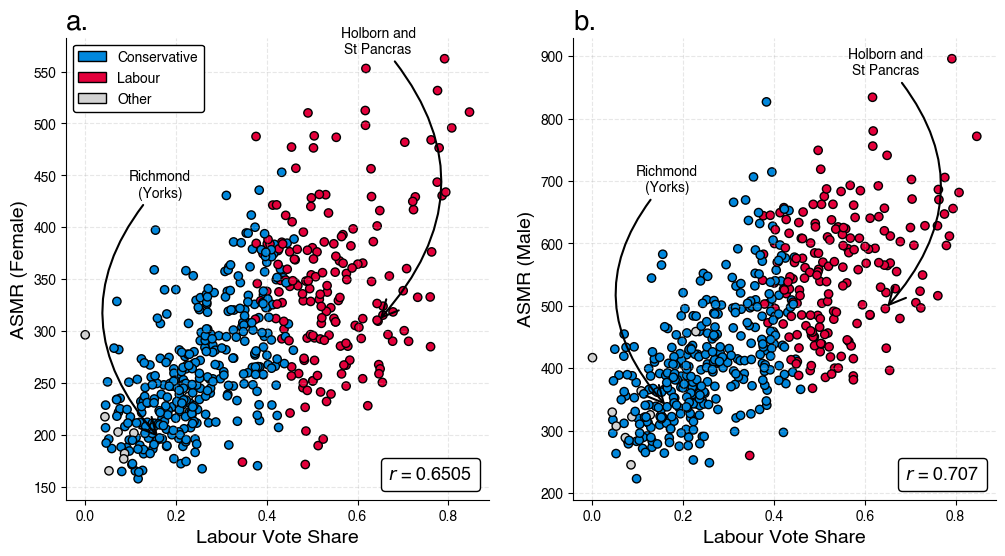

In [3]:
plot_scatters(df_m)

Before we move on to creating the bivariate chorpleths, we should give full and unreserved thanks to [Suzuki Shosuke](https://github.com/shosuke-13/Japan-Bivariate-Choroplethmaps) for their insipirational code which helps us to do something that is not trivially easy in Python. Great job and many thanks, Suzuki!

To work towards plotting the choropleth maps, we need to load our shapefile and merge geometry into our regular pandas dataframe (to make it a geopandas dataframe, with 'geometry' as the series of interest):

In [4]:
df_gpd = make_df_gpd(df_m)

We'll now plot a couple more bivariate choropleth maps, this time by deprivation (Health Deprivation and Disability and the Index of Multiple Deprivation), here converted into ranked ordinal data:

Labour vote share vs Health Deprivation rank correlation coefficient: -0.687, p-value 9.612613273047163e-76
Labour vote share vs IMD rank correlation coefficient: -0.695, p-value 3.631570952800264e-78


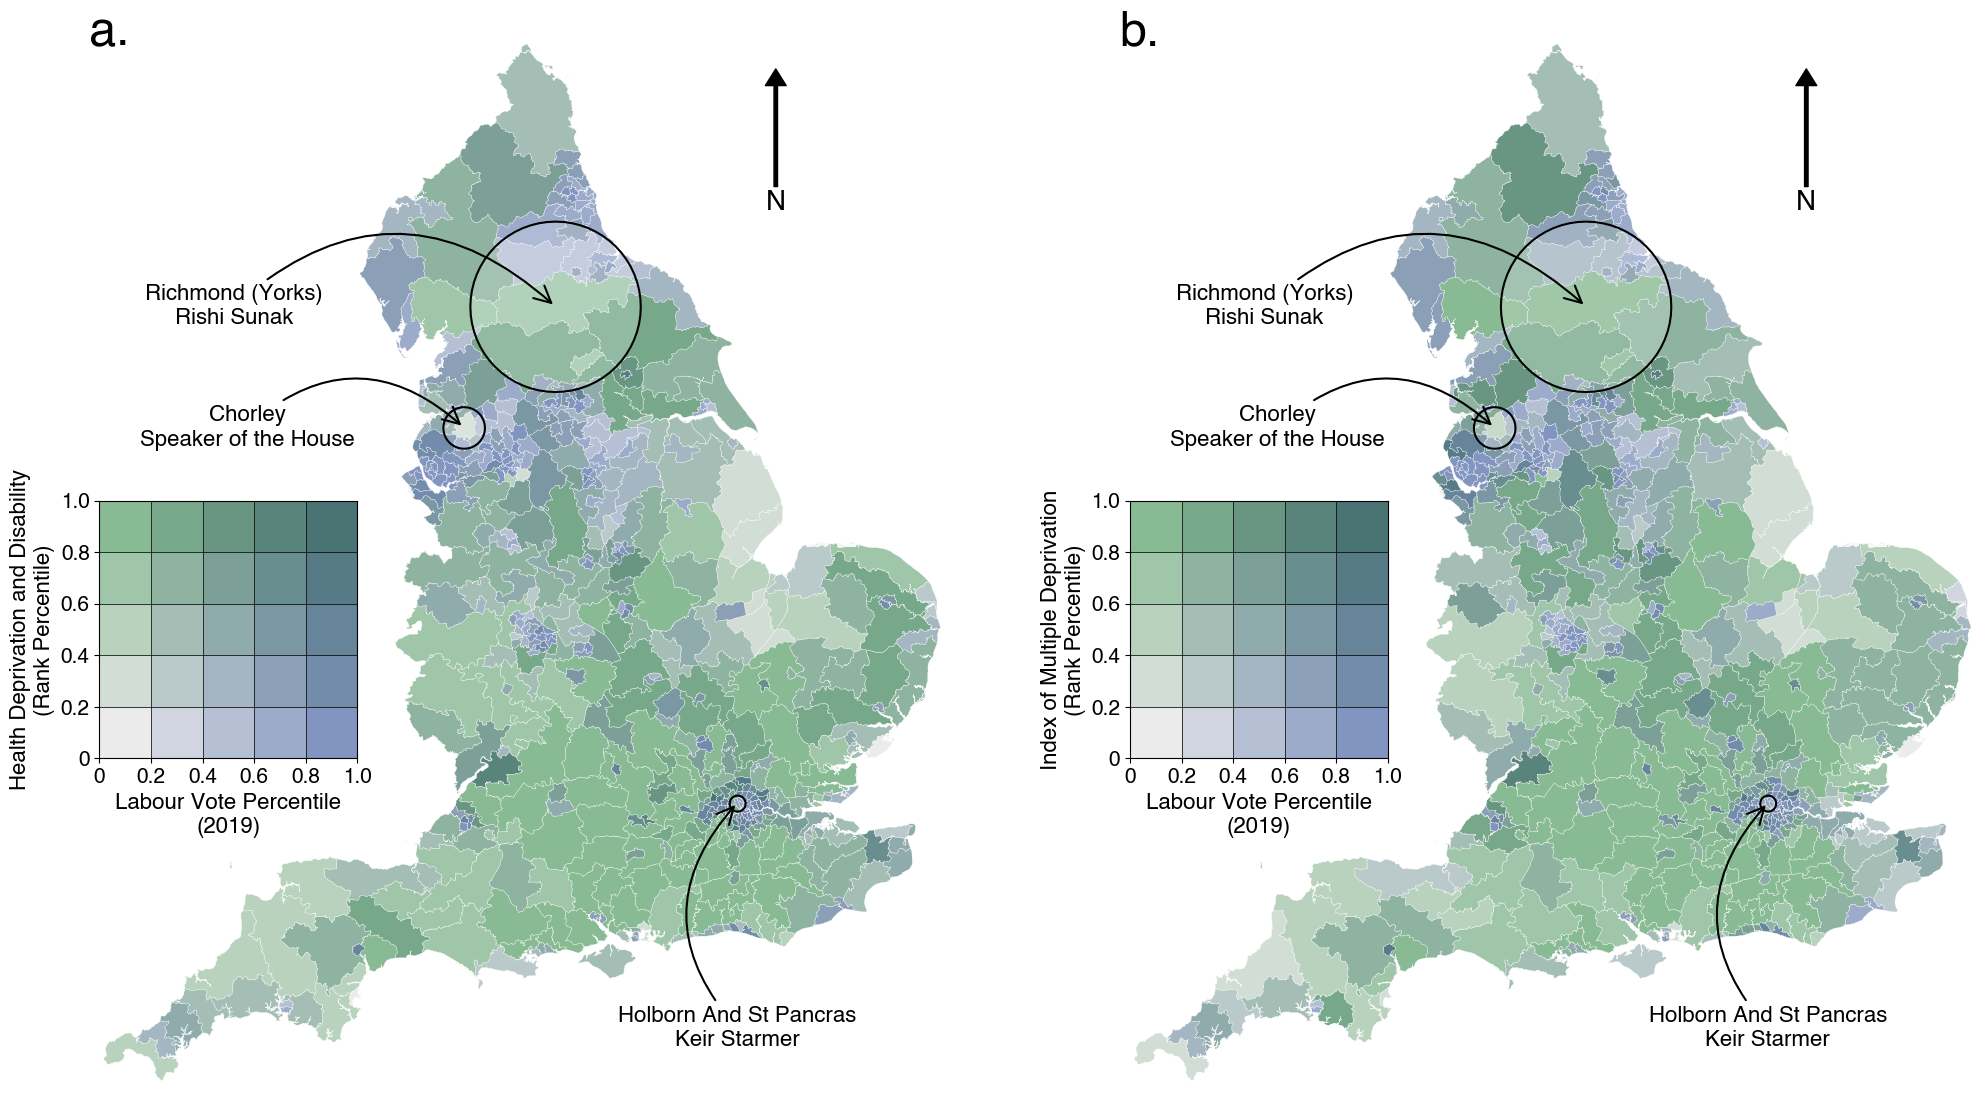

In [5]:
plot_bivariate_choropleth_map(df_gpd)

Before we move on to any temporal analysis, lets create a table that we can use to look up values and p-values from to do with these rank correlations:

In [6]:
table_rho, table_p = make_summary_tables(df_gpd)

Lets get some spearmans rho's from the first table (note that the spearmans rho's are slightly different to the pearsons rs in the scatterplot above):

In [7]:
print(table_rho.to_markdown())

|                                   |    Con PC |    Lab PC |    Lib PC |    Brx PC |
|:----------------------------------|----------:|----------:|----------:|----------:|
| ASMR_f                            | -0.44692  |  0.663459 | -0.704783 |  0.638563 |
| ASMR_m                            | -0.511559 |  0.722867 | -0.682043 |  0.643808 |
| Income                            |  0.541061 | -0.743394 |  0.658955 | -0.657365 |
| Employment                        |  0.429826 | -0.640775 |  0.713256 | -0.649861 |
| Education, skills and training    |  0.121012 | -0.381527 |  0.67667  | -0.452276 |
| Health deprivation and disability |  0.507234 | -0.687281 |  0.68504  | -0.69328  |
| IMD rank 2019                     |  0.493717 | -0.695201 |  0.672692 | -0.65624  |


And their associated p-values:

In [8]:
print(table_p.to_markdown())

|                                   |      Con PC |      Lab PC |      Lib PC |      Brx PC |
|:----------------------------------|------------:|------------:|------------:|------------:|
| ASMR_f                            | 1.56296e-27 | 6.66226e-69 | 3.31996e-81 | 2.13982e-62 |
| ASMR_m                            | 6.99879e-37 | 2.74171e-87 | 3.49067e-74 | 1.02301e-63 |
| Income                            | 7.34632e-42 | 8.27936e-95 | 1.11399e-67 | 2.97672e-67 |
| Employment                        | 2.23908e-25 | 5.97969e-63 | 5.36482e-84 | 2.83994e-65 |
| Education, skills and training    | 0.00515003  | 6.51819e-20 | 1.28697e-72 | 3.11097e-28 |
| Health deprivation and disability | 3.4254e-36  | 9.61261e-76 | 4.51237e-75 | 1.42881e-77 |
| IMD rank 2019                     | 4.2452e-34  | 3.63157e-78 | 1.77115e-71 | 5.94574e-67 |


What are the patterns like over time at a national level? First load in some data from the ONS on the [PHOF_Slope_Index_of_Inequality](https://fingertips.phe.org.uk/documents/PHOF_Slope_Index_of_Inequality_Method.pdf), followed by [data](https://analytics.phe.gov.uk/apps/health-inequalities-dashboard/) from the Office for Health Improvement and Disparities:

In [9]:
df_sii = make_sii()
df_hid = make_hid()

Then, lets make a couple of plots over time. The first is our SII metric for male and females (subfigure 'a.'), and the second and third subfigures look at Male and Female Health Life Expectancy at Birth at the 1st, 5th, and 10th decile of deprivation.

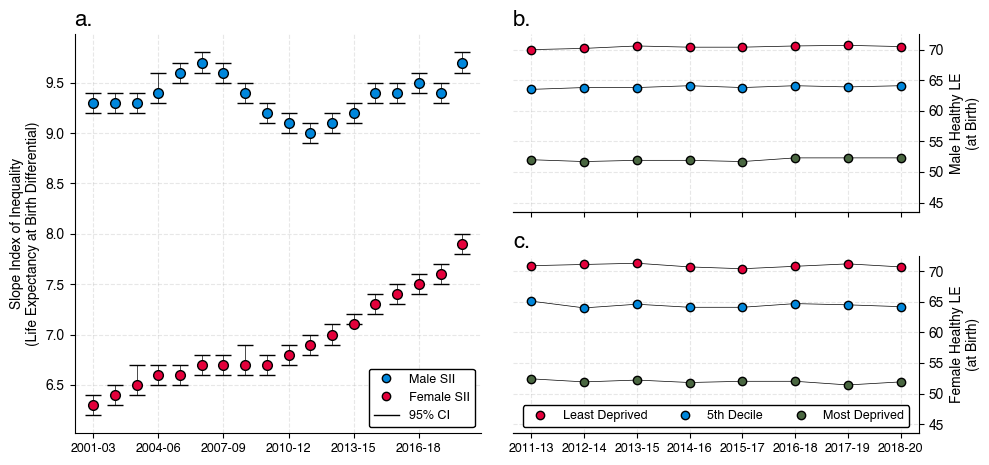

In [10]:
plot_over_time(df_sii, df_hid)

Finally, lets get a few scalars about these changes in case we want to use them:

In [11]:
make_temporal_printouts(df_sii, df_hid)

In 2001-2003, the SII for females was: 6.3
In 2018-2020, the SII for females was: 7.9
In 2001-2003, the SII for males was: 9.3
In 2018-2020, the SII for males was: 9.7
In 2011-2013, Male Healthy LE for 1st decile was: 52.0
In 2011-2013, Male Healthy LE for 10th decile was: 70.0
In 2018-2020, Male Healthy LE for 1st decile was: 52.3
In 2018-2020, Male Healthy LE for 10th decile was: 70.5
In 2011-2013, Female Healthy LE for 1st decile was: 52.4
In 2011-2013, Female Healthy LE for 10th decile was: 70.9
In 2018-2020, Female Healthy LE for 1st decile was: 51.9
In 2018-2020, Female Healthy LE for 10th decile was: 70.7
